In [1]:
#importing required libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
#uploading the dataset
salary=pd.read_csv("./Salary_Data.csv")
print("data loaded sucessfully")

data loaded sucessfully


In [3]:
salary.head()

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891


In [4]:
salary['Experience'] = salary['YearsExperience'].fillna(0).astype(int)

In [5]:
salary.head()

,YearsExperience,Age,Salary,Experience
0,1.1,21.0,39343,1
1,1.3,21.5,46205,1
2,1.5,21.7,37731,1
3,2.0,22.0,43525,2
4,2.2,22.2,39891,2


In [6]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Age              30 non-null     float64
 2   Salary           30 non-null     int64  
 3   Experience       30 non-null     int32  
dtypes: float64(2), int32(1), int64(1)
memory usage: 968.0 bytes


In [7]:
salary.drop(['YearsExperience'],axis = 1)

,Age,Salary,Experience
0,21.0,39343,1
1,21.5,46205,1
2,21.7,37731,1
3,22.0,43525,2
4,22.2,39891,2
5,23.0,56642,2
6,23.0,60150,3
7,23.3,54445,3
8,23.3,64445,3
9,23.6,57189,3


In [8]:
salary.describe()

,YearsExperience,Age,Salary,Experience
count,30.000000,30.000000,30.000000,30.000000
mean,5.313333,27.216667,76003.000000,4.933333
std,2.837888,5.161267,27414.429785,2.790789
min,1.100000,21.000000,37731.000000,1.000000
25%,3.200000,23.300000,56720.750000,3.000000
50%,4.700000,25.000000,65237.000000,4.000000
75%,7.700000,30.750000,100544.750000,7.000000
max,10.500000,38.000000,122391.000000,10.000000


In [9]:
#checking for mising value
salary.isnull().sum()

YearsExperience    0
Age                0
Salary             0
Experience         0
dtype: int64

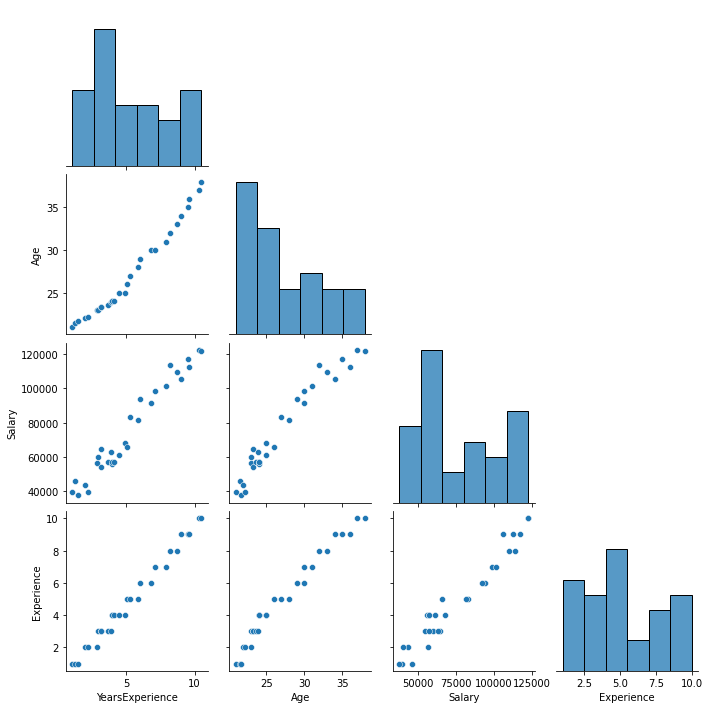

In [10]:
sns.pairplot(salary,corner=True)


In [11]:
fig=px.bar(salary,salary['YearsExperience'],salary['Salary'])
fig.show()

from above visuvalization as the years of experience increases the salary is increases 

In [12]:
fig=px.bar(salary,salary['Age'],salary['Salary'])
fig.show()

#from the above code as the as the age increases the salary is not increassing

In [13]:
salary.columns

Index(['YearsExperience', 'Age', 'Salary', 'Experience'], dtype='object')

In [14]:
salary.dtypes

YearsExperience    float64
Age                float64
Salary               int64
Experience           int32
dtype: object

In [15]:
#spliting the data
x=salary[['Experience']]
y=salary['Salary']
y.head()

0    39343
1    46205
2    37731
3    43525
4    39891
Name: Salary, dtype: int64

In [16]:
x =x.values.reshape(-1,1)
y = y.values.reshape(-1,1)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
LR = LinearRegression()

In [18]:
LR.fit(x_train,y_train)
pred=LR.predict(y_test)

In [19]:
LR.score(x_test,y_test)*100

93.26951804818833

In [22]:
import pickle as pk

pickle_out = open("LR.pkl", "wb")
pk.dump(LR, pickle_out)
pickle_out.close()